/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


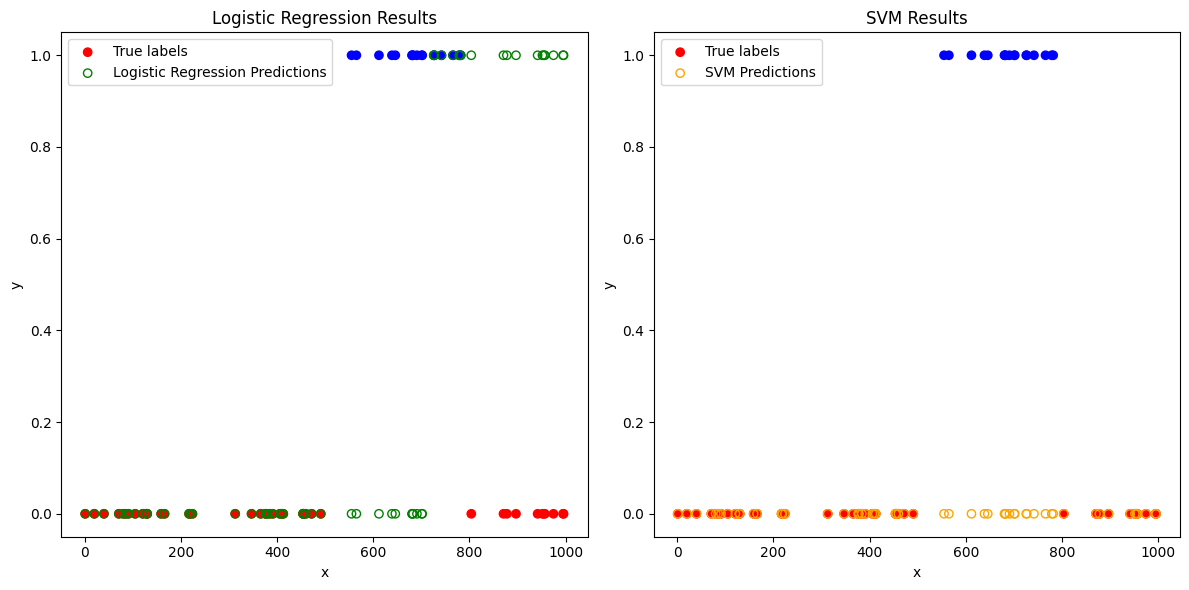

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1. 產生300個0到1000之間的隨機數列 x
np.random.seed(42)  # 設置隨機種子以保證結果可重現
x = np.random.randint(0, 1001, 300).reshape(-1, 1)

# 2. 分成兩類，當 500 <= x <= 800 時 y = 1，其餘 y = 0
y = np.where((x >= 500) & (x <= 800), 1, 0)

# 3. 分割數據集 (80%訓練集, 20%測試集)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4. Logistic Regression 模型
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y1_pred = log_reg.predict(x_test)

# 5. SVM 模型
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)
y2_pred = svm_model.predict(x_test)

# 6. 繪製結果
# 設置顏色
colors = ['red' if label == 0 else 'blue' for label in y_test.ravel()]

# Logistic Regression 結果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_test, y_test, c=colors, label='True labels')
plt.scatter(x_test, y1_pred, facecolors='none', edgecolors='green', label='Logistic Regression Predictions')
plt.title('Logistic Regression Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# SVM 結果
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, c=colors, label='True labels')
plt.scatter(x_test, y2_pred, facecolors='none', edgecolors='orange', label='SVM Predictions')
plt.title('SVM Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()